# The Derivative as a Function

### Charlie Bailey (peba2926)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Numerical Point Derivative Code

Based on the activity #3 in week 3, we determined numerically that the Q1 function $\frac{f(a + h) - f(a - h)}{2h}$ was more accurate than Q2 $\frac{f(a + h) - f(a)}{h}$ because it stabilized to the true derivative faster (with more significant figures) than Q2. This makes sense because Q1 considers point on *both* sides of the point at which we are trying to find the derivative (+h and -h)—vs. Q2 which only considers the +h value to calculate the slope estimate.

For these reasons, I have decided to use the more accurate Q1 in my numerical point derivative function below.

In [2]:
# insert function in this code block
def numerical_point_derivative(f, a, h=0.0001):
    return (f(a + h) - f(a - h)) / (2*h)

#### Test on examples

In [3]:
# f(x) = 1/x at x = 2

x_1 = 2
def f_1(x):
    return 1/x

derivative_1 = numerical_point_derivative(lambda x: 1/x, x_1)
print(derivative_1)

-0.25000000062558314


In [4]:
# f(x) = sin(7x) at x = 3

x_2 = 3
def f_2(x):
    return np.sin(7*x)

derivative_2 = numerical_point_derivative(f_2, x_2)
print(derivative_2)

-3.8341045084616665


In [5]:
# f(x) = x^3 at x = 200

x_3 = 200
def f_3(x):
    return x**3

derivative_3 = numerical_point_derivative(f_3, x_3)
print(derivative_3)

120000.00000465661


In [6]:
# f(x) = 2^x at x = 5

x_4 = 5
def f_4(x):
    return 2**x

derivative_4 = numerical_point_derivative(f_4, x_4)
print(derivative_4)

22.180709795645015


## Numerical Derivative Calculator Comparison

Calculator used for comparisons below: https://www.wolframalpha.com/widgets/view.jsp?id=a278064e754d61cbecc14f913b8d5295

| Function         | Numerical point derivative function | Numerical derivative calculator |
|------------------|-------------------------------------|---------------------------------|
| 1/x at x = 2     | -0.25000000062558314                | -0.25                           |
| sin(7x) at x = 3 | -3.8341045084616665                 | -3.8341                         |
| x^3 at x = 200   | 120000.00000465661                  | 120000                          |
| 2^x at x = 5     | 22.180709795645015                  | 22.1807                         |

In comparison to the Wolfram Alpha numerical derivative calculator I found online, the Numerical Point Derivative function above does quite well. We can see the the approximate form matches the number of significant figures produced by the Wolfram Alpha calculator exactly for $sin(7x)$ and $2^x$. However, because we are using the quotient estimate for the derivative, we can never get the exact number (when one exists) that we see with $1/x$ and $x^3$. Even though the results of the numerical point derivative function are very close in both calculations (to 9 decimal points for $1/x$ and 6 decimal points for $x^3$), we still get trailing values that are a function of the estimation nature of this derivative calculation method.

## Section 3.5

### Problem 2

$s$ = graph $a$

$s^{\prime}$ = graph $c$

We can deduce this because graph $a$ has 4 points where it is horizontal and therefore the derivative is 0. Graph $c$ has 4 points where the function $c$ crosses the x-axis. We can further confirm this by noting that there are 5 inflection points where the slope of $a$ transitions from increasing to decreasing. This aligns with the 5 peaks and troughs in graph $c$ (including the two peaks at the start and end of the function).

$c$ = graph $b$

$c^{\prime}$ = graph $d$

We can follow similar logic to deduce the remaining two graphs. Counting where the slope of $b$ is horizontal (8) matches the number of times the function in graph $d$ is equal to 0 (crosses the x-axis). The peaks and troughs of the function in graph $d$ also align with the number of inflection points in graph $b$. Finally, we can deduce that $s$ is graph $a$ and $c$ is graph $b$ because we know that $c(t) = s(2t)$. There are twice as many oscillations in function $b$ over the same x range—which implies the slopes must be twice as steep. Therefore, the y range magnitudes of the derivative graph of $c$ should be twice that of the derivative graph of function $s$—which is exactly what we see in the comparison between graph $c$ and graph $d$.

### Problem 5

![Graphs of derivatives](./assets/derivative_graphs.png)

## Numerical Function Derivative Code

In [100]:
# code for function to graph the derivative here
def numerical_function_derivative(f, f_str, xl=1, xr=3, num_points=20):
    x_points = np.linspace(xl, xr, num_points)
    y_points = np.array([numerical_point_derivative(f, x) for x in x_points])

    plt.plot(x_points, y_points)
    plt.title(f"Numerically calculated derivative of {f_str}")    
    plt.grid(True)
    plt.show()

In [101]:
def generate_graph(f, f_str, xl=1, xr=3, num_points=1000):
    x_points = np.linspace(xl, xr, num_points)
    y_points = f(x_points)

    plt.plot(x_points, y_points, label=f_str)
    plt.title(f"Graph of the function {f_str}")
    plt.grid(True)
    plt.legend()
    plt.show()

### Problem 10 functions

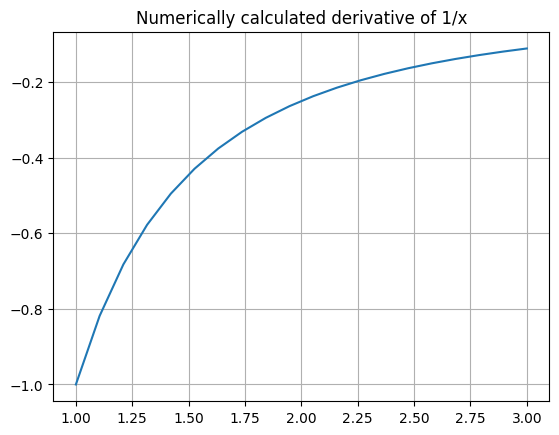

In [102]:
# f(x) = 1/x
numerical_function_derivative(lambda x: 1/x, r'1/x')

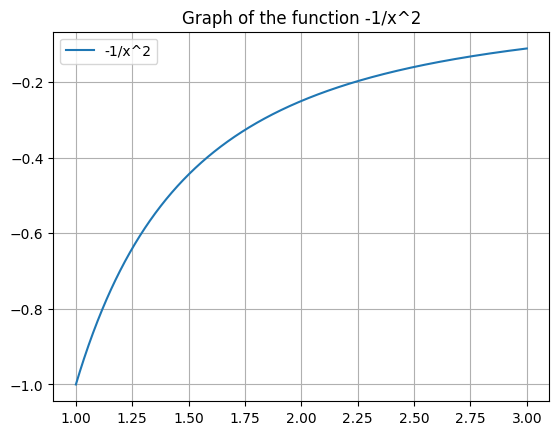

In [103]:
# f'(x) = -1/x^2
generate_graph(lambda x: -1/x**2, r'-1/x^2')

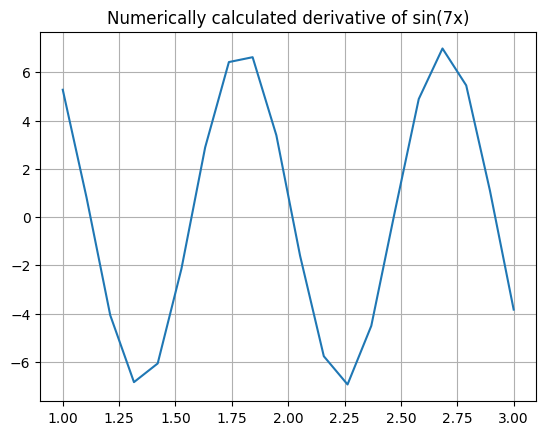

In [104]:
# f(x) = sin(7x)
numerical_function_derivative(lambda x: np.sin(7*x), r'sin(7x)')

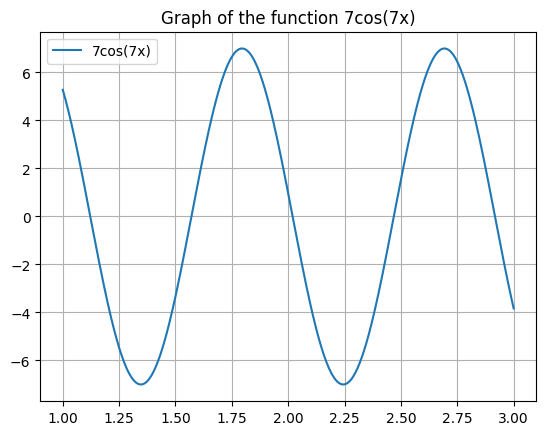

In [105]:
# f'(x) = 7cos(7x)
generate_graph(lambda x: 7 * np.cos(7*x), r'7cos(7x)')

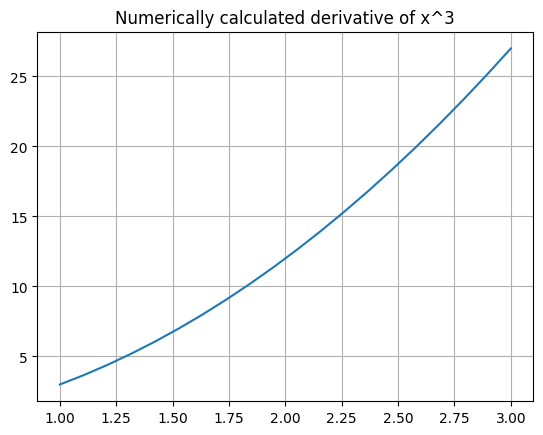

In [106]:
# f(x) = x^3
numerical_function_derivative(lambda x: x**3, r'x^3')

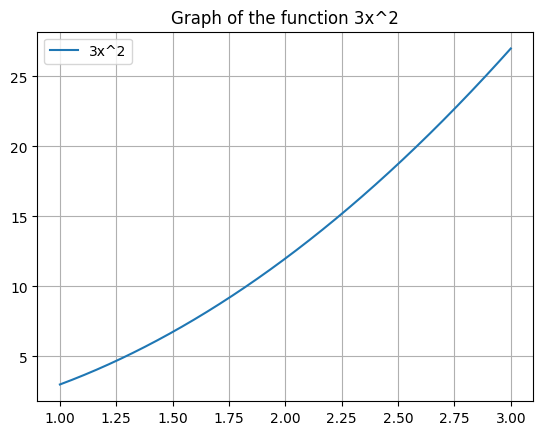

In [107]:
# f'(x) = 3x^2
generate_graph(lambda x: 3*x**2, r'3x^2')

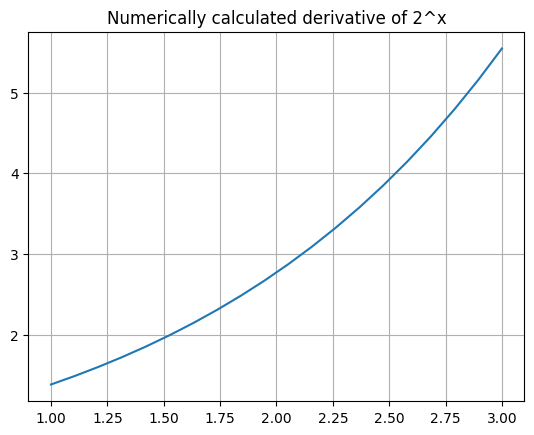

In [108]:
# f(2^x)
numerical_function_derivative(lambda x: 2**x, r'2^x')

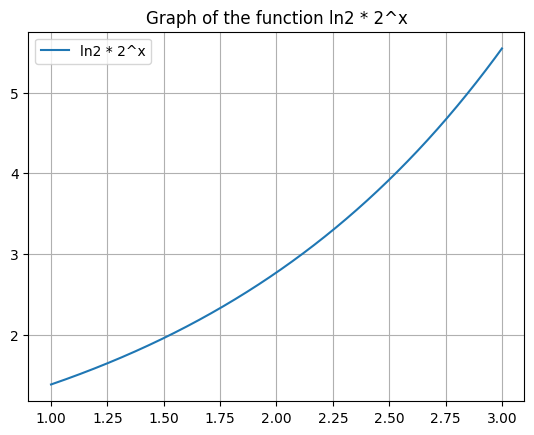

In [109]:
# f'(x) = ln2 * 2^x
generate_graph(lambda x: np.log(2)*2**x, r'ln2 * 2^x')

As we can see in the comparisons of the graphs above, our numerical_function_derivative function is a very good approximation for the derivative of the 4 functions provided—with the exception of $sin(7x)$. This is because we are only graphing the derivative of each function at a sample of 20 points. In all of the other graphs, this is enough to impute a 'smoothness' to the graph where the transitions between each of the 20 points are hardly noticable. However, with the $sin(7x)$—because the graph changes directions so much—it becomes immediately obvious that 20 points is not enough. In testing though, if we up the number of points to >100, we see a graph that looks identical to the graph of the derivative "function" $7cos(7x)$. This tells us that our numerical_function_derivative is indeed accurate and the only parameter we need to tweak is the granulatity (i.e., the number of points we are plotting over).